## Enviroment: 
Open AI gym [MountainCar-v0](https://github.com/openai/gym/wiki/MountainCar-v0)

### Observation
Type: Box(2)

| Num  | Observation | Min   | Max  |
| ---- | ----------- | ----- | ---- |
| 0    | position    | -1.2  | 0.6  |
| 1    | velocity    | -0.07 | 0.07 |

### Actions

Type: Discrete(3)

| Num  | Action     |
| ---- | ---------- |
| 0    | push left  |
| 1    | no push    |
| 2    | push right |

### Reward

-1 for each time step, until the goal position of 0.5 is reached. As with MountainCarContinuous v0, there is no penalty for climbing the left hill, which upon reached acts as a wall.

### Starting State

Random position from -0.6 to -0.4 with no velocity.

### Episode Termination

The episode ends when you reach 0.5 position, or if 200 iterations are reached.


## 1. gym enviroment setup

In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

env = gym.make("MountainCar-v0")
env.reset()

array([-0.40332806,  0.        ])

## 2. Q Table setup

In [12]:
LEARNING_RATE = 0.5
DISCOUNT = 0.95
EPISODES = 10000
SHOW_EVERY = 200
Q_TABLE_LEN = 20

In [13]:
DISCRETE_OS_SIZE = [Q_TABLE_LEN] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / DISCRETE_OS_SIZE

# q_table = np.random.uniform(low=0, high=1,
#                             size=(DISCRETE_OS_SIZE + [env.action_space.n]))

q_table = np.zeros((DISCRETE_OS_SIZE + [env.action_space.n]))

In [14]:
q_table.shape

(20, 20, 3)

### Decay epsilon 

In [15]:
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

## 3. Help functions 

In [16]:
def get_discrete_state (state):
    discrete_state = (state - env.observation_space.low) // discrete_os_win_size
    return tuple(discrete_state.astype(int))

def take_epilon_greedy_action(state, epsilon):
    discrete_state = get_discrete_state(state)
    if np.random.random() < epsilon:
        action = np.random.randint(0,env.action_space.n)
    else:
        action = np.argmax(q_table[discrete_state])
    return action

## 4. Rewards Recorder setup 

In [17]:
ep_rewards = []
aggr_ep_rewards = {'ep':[],'avg':[],'min':[],'max':[]}

## 5. Train the Agent 

In [18]:
for episode in range(EPISODES):
    # initiate reward every episode
    ep_reward = 0
    if episode % SHOW_EVERY == 0:
        print("episode: {}".format(episode))
        render = True
    else:
        render = False

    state = env.reset()
    action = take_epilon_greedy_action(state, epsilon)
    
    done = False
    while not done:

        next_state, reward, done, _ = env.step(action)

        ep_reward += reward
        
        next_action = take_epilon_greedy_action(next_state, epsilon)

        # if render:
        #     env.render()

        if not done:

            td_target = reward + DISCOUNT * q_table[get_discrete_state(next_state)][next_action]

            q_table[get_discrete_state(state)][action] += LEARNING_RATE * (td_target - q_table[get_discrete_state(state)][action])

        elif next_state[0] >= 0.5:
            print("I made it on episode: {} Reward: {}".format(episode,reward))
            q_table[get_discrete_state(state)][action] = 0


        state = next_state
        action = next_action

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

    # recoard aggrated rewards on each epsoide
    ep_rewards.append(ep_reward)

    # every SHOW_EVERY calculate average rewords
    if episode % SHOW_EVERY == 0:
        avg_reward = sum(ep_rewards[-SHOW_EVERY:]) / len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(avg_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))

episode: 0
episode: 200
episode: 400
episode: 600
episode: 800
episode: 1000
episode: 1200
episode: 1400
episode: 1600
episode: 1800
episode: 2000
episode: 2200
episode: 2400
episode: 2600
episode: 2800
episode: 3000
episode: 3200
episode: 3400
episode: 3600
episode: 3800
I made it on episode: 3906 Reward: -1.0
I made it on episode: 3948 Reward: -1.0
episode: 4000
I made it on episode: 4016 Reward: -1.0
I made it on episode: 4018 Reward: -1.0
I made it on episode: 4020 Reward: -1.0
I made it on episode: 4118 Reward: -1.0
I made it on episode: 4124 Reward: -1.0
I made it on episode: 4126 Reward: -1.0
I made it on episode: 4183 Reward: -1.0
I made it on episode: 4195 Reward: -1.0
episode: 4200
I made it on episode: 4201 Reward: -1.0
I made it on episode: 4207 Reward: -1.0
I made it on episode: 4218 Reward: -1.0
I made it on episode: 4271 Reward: -1.0
I made it on episode: 4277 Reward: -1.0
I made it on episode: 4278 Reward: -1.0
I made it on episode: 4279 Reward: -1.0
I made it on episod

I made it on episode: 5094 Reward: -1.0
I made it on episode: 5095 Reward: -1.0
I made it on episode: 5097 Reward: -1.0
I made it on episode: 5098 Reward: -1.0
I made it on episode: 5100 Reward: -1.0
I made it on episode: 5101 Reward: -1.0
I made it on episode: 5104 Reward: -1.0
I made it on episode: 5105 Reward: -1.0
I made it on episode: 5109 Reward: -1.0
I made it on episode: 5111 Reward: -1.0
I made it on episode: 5112 Reward: -1.0
I made it on episode: 5114 Reward: -1.0
I made it on episode: 5115 Reward: -1.0
I made it on episode: 5116 Reward: -1.0
I made it on episode: 5117 Reward: -1.0
I made it on episode: 5119 Reward: -1.0
I made it on episode: 5122 Reward: -1.0
I made it on episode: 5123 Reward: -1.0
I made it on episode: 5127 Reward: -1.0
I made it on episode: 5128 Reward: -1.0
I made it on episode: 5129 Reward: -1.0
I made it on episode: 5130 Reward: -1.0
I made it on episode: 5131 Reward: -1.0
I made it on episode: 5133 Reward: -1.0
I made it on episode: 5134 Reward: -1.0


I made it on episode: 5382 Reward: -1.0
I made it on episode: 5383 Reward: -1.0
I made it on episode: 5384 Reward: -1.0
I made it on episode: 5385 Reward: -1.0
I made it on episode: 5386 Reward: -1.0
I made it on episode: 5387 Reward: -1.0
I made it on episode: 5388 Reward: -1.0
I made it on episode: 5389 Reward: -1.0
I made it on episode: 5390 Reward: -1.0
I made it on episode: 5391 Reward: -1.0
I made it on episode: 5392 Reward: -1.0
I made it on episode: 5393 Reward: -1.0
I made it on episode: 5394 Reward: -1.0
I made it on episode: 5395 Reward: -1.0
I made it on episode: 5396 Reward: -1.0
I made it on episode: 5397 Reward: -1.0
I made it on episode: 5398 Reward: -1.0
I made it on episode: 5399 Reward: -1.0
episode: 5400
I made it on episode: 5400 Reward: -1.0
I made it on episode: 5401 Reward: -1.0
I made it on episode: 5402 Reward: -1.0
I made it on episode: 5403 Reward: -1.0
I made it on episode: 5404 Reward: -1.0
I made it on episode: 5405 Reward: -1.0
I made it on episode: 5406

I made it on episode: 5600 Reward: -1.0
I made it on episode: 5601 Reward: -1.0
I made it on episode: 5602 Reward: -1.0
I made it on episode: 5603 Reward: -1.0
I made it on episode: 5604 Reward: -1.0
I made it on episode: 5605 Reward: -1.0
I made it on episode: 5606 Reward: -1.0
I made it on episode: 5607 Reward: -1.0
I made it on episode: 5608 Reward: -1.0
I made it on episode: 5609 Reward: -1.0
I made it on episode: 5610 Reward: -1.0
I made it on episode: 5611 Reward: -1.0
I made it on episode: 5612 Reward: -1.0
I made it on episode: 5613 Reward: -1.0
I made it on episode: 5614 Reward: -1.0
I made it on episode: 5615 Reward: -1.0
I made it on episode: 5616 Reward: -1.0
I made it on episode: 5617 Reward: -1.0
I made it on episode: 5618 Reward: -1.0
I made it on episode: 5619 Reward: -1.0
I made it on episode: 5620 Reward: -1.0
I made it on episode: 5621 Reward: -1.0
I made it on episode: 5622 Reward: -1.0
I made it on episode: 5623 Reward: -1.0
I made it on episode: 5624 Reward: -1.0


I made it on episode: 5846 Reward: -1.0
I made it on episode: 5847 Reward: -1.0
I made it on episode: 5848 Reward: -1.0
I made it on episode: 5849 Reward: -1.0
I made it on episode: 5850 Reward: -1.0
I made it on episode: 5851 Reward: -1.0
I made it on episode: 5852 Reward: -1.0
I made it on episode: 5853 Reward: -1.0
I made it on episode: 5854 Reward: -1.0
I made it on episode: 5855 Reward: -1.0
I made it on episode: 5856 Reward: -1.0
I made it on episode: 5857 Reward: -1.0
I made it on episode: 5858 Reward: -1.0
I made it on episode: 5859 Reward: -1.0
I made it on episode: 5860 Reward: -1.0
I made it on episode: 5861 Reward: -1.0
I made it on episode: 5862 Reward: -1.0
I made it on episode: 5863 Reward: -1.0
I made it on episode: 5864 Reward: -1.0
I made it on episode: 5865 Reward: -1.0
I made it on episode: 5867 Reward: -1.0
I made it on episode: 5868 Reward: -1.0
I made it on episode: 5869 Reward: -1.0
I made it on episode: 5870 Reward: -1.0
I made it on episode: 5871 Reward: -1.0


I made it on episode: 6065 Reward: -1.0
I made it on episode: 6066 Reward: -1.0
I made it on episode: 6067 Reward: -1.0
I made it on episode: 6068 Reward: -1.0
I made it on episode: 6069 Reward: -1.0
I made it on episode: 6070 Reward: -1.0
I made it on episode: 6071 Reward: -1.0
I made it on episode: 6072 Reward: -1.0
I made it on episode: 6073 Reward: -1.0
I made it on episode: 6074 Reward: -1.0
I made it on episode: 6075 Reward: -1.0
I made it on episode: 6077 Reward: -1.0
I made it on episode: 6078 Reward: -1.0
I made it on episode: 6079 Reward: -1.0
I made it on episode: 6080 Reward: -1.0
I made it on episode: 6081 Reward: -1.0
I made it on episode: 6082 Reward: -1.0
I made it on episode: 6083 Reward: -1.0
I made it on episode: 6084 Reward: -1.0
I made it on episode: 6085 Reward: -1.0
I made it on episode: 6086 Reward: -1.0
I made it on episode: 6087 Reward: -1.0
I made it on episode: 6088 Reward: -1.0
I made it on episode: 6089 Reward: -1.0
I made it on episode: 6090 Reward: -1.0


I made it on episode: 6275 Reward: -1.0
I made it on episode: 6276 Reward: -1.0
I made it on episode: 6277 Reward: -1.0
I made it on episode: 6278 Reward: -1.0
I made it on episode: 6279 Reward: -1.0
I made it on episode: 6280 Reward: -1.0
I made it on episode: 6281 Reward: -1.0
I made it on episode: 6282 Reward: -1.0
I made it on episode: 6283 Reward: -1.0
I made it on episode: 6284 Reward: -1.0
I made it on episode: 6285 Reward: -1.0
I made it on episode: 6286 Reward: -1.0
I made it on episode: 6287 Reward: -1.0
I made it on episode: 6288 Reward: -1.0
I made it on episode: 6289 Reward: -1.0
I made it on episode: 6290 Reward: -1.0
I made it on episode: 6291 Reward: -1.0
I made it on episode: 6292 Reward: -1.0
I made it on episode: 6293 Reward: -1.0
I made it on episode: 6294 Reward: -1.0
I made it on episode: 6295 Reward: -1.0
I made it on episode: 6296 Reward: -1.0
I made it on episode: 6297 Reward: -1.0
I made it on episode: 6298 Reward: -1.0
I made it on episode: 6299 Reward: -1.0


I made it on episode: 6490 Reward: -1.0
I made it on episode: 6491 Reward: -1.0
I made it on episode: 6492 Reward: -1.0
I made it on episode: 6493 Reward: -1.0
I made it on episode: 6494 Reward: -1.0
I made it on episode: 6495 Reward: -1.0
I made it on episode: 6496 Reward: -1.0
I made it on episode: 6497 Reward: -1.0
I made it on episode: 6498 Reward: -1.0
I made it on episode: 6499 Reward: -1.0
I made it on episode: 6500 Reward: -1.0
I made it on episode: 6501 Reward: -1.0
I made it on episode: 6502 Reward: -1.0
I made it on episode: 6503 Reward: -1.0
I made it on episode: 6504 Reward: -1.0
I made it on episode: 6505 Reward: -1.0
I made it on episode: 6506 Reward: -1.0
I made it on episode: 6507 Reward: -1.0
I made it on episode: 6508 Reward: -1.0
I made it on episode: 6509 Reward: -1.0
I made it on episode: 6510 Reward: -1.0
I made it on episode: 6511 Reward: -1.0
I made it on episode: 6512 Reward: -1.0
I made it on episode: 6513 Reward: -1.0
I made it on episode: 6514 Reward: -1.0


I made it on episode: 6703 Reward: -1.0
I made it on episode: 6704 Reward: -1.0
I made it on episode: 6705 Reward: -1.0
I made it on episode: 6706 Reward: -1.0
I made it on episode: 6707 Reward: -1.0
I made it on episode: 6708 Reward: -1.0
I made it on episode: 6709 Reward: -1.0
I made it on episode: 6710 Reward: -1.0
I made it on episode: 6711 Reward: -1.0
I made it on episode: 6712 Reward: -1.0
I made it on episode: 6713 Reward: -1.0
I made it on episode: 6714 Reward: -1.0
I made it on episode: 6715 Reward: -1.0
I made it on episode: 6716 Reward: -1.0
I made it on episode: 6717 Reward: -1.0
I made it on episode: 6718 Reward: -1.0
I made it on episode: 6719 Reward: -1.0
I made it on episode: 6720 Reward: -1.0
I made it on episode: 6721 Reward: -1.0
I made it on episode: 6722 Reward: -1.0
I made it on episode: 6723 Reward: -1.0
I made it on episode: 6724 Reward: -1.0
I made it on episode: 6725 Reward: -1.0
I made it on episode: 6726 Reward: -1.0
I made it on episode: 6727 Reward: -1.0


I made it on episode: 6914 Reward: -1.0
I made it on episode: 6915 Reward: -1.0
I made it on episode: 6916 Reward: -1.0
I made it on episode: 6917 Reward: -1.0
I made it on episode: 6918 Reward: -1.0
I made it on episode: 6919 Reward: -1.0
I made it on episode: 6920 Reward: -1.0
I made it on episode: 6921 Reward: -1.0
I made it on episode: 6922 Reward: -1.0
I made it on episode: 6923 Reward: -1.0
I made it on episode: 6924 Reward: -1.0
I made it on episode: 6925 Reward: -1.0
I made it on episode: 6926 Reward: -1.0
I made it on episode: 6927 Reward: -1.0
I made it on episode: 6928 Reward: -1.0
I made it on episode: 6929 Reward: -1.0
I made it on episode: 6930 Reward: -1.0
I made it on episode: 6931 Reward: -1.0
I made it on episode: 6932 Reward: -1.0
I made it on episode: 6933 Reward: -1.0
I made it on episode: 6934 Reward: -1.0
I made it on episode: 6935 Reward: -1.0
I made it on episode: 6936 Reward: -1.0
I made it on episode: 6937 Reward: -1.0
I made it on episode: 6938 Reward: -1.0


I made it on episode: 7119 Reward: -1.0
I made it on episode: 7120 Reward: -1.0
I made it on episode: 7121 Reward: -1.0
I made it on episode: 7122 Reward: -1.0
I made it on episode: 7123 Reward: -1.0
I made it on episode: 7124 Reward: -1.0
I made it on episode: 7125 Reward: -1.0
I made it on episode: 7126 Reward: -1.0
I made it on episode: 7127 Reward: -1.0
I made it on episode: 7128 Reward: -1.0
I made it on episode: 7129 Reward: -1.0
I made it on episode: 7130 Reward: -1.0
I made it on episode: 7131 Reward: -1.0
I made it on episode: 7132 Reward: -1.0
I made it on episode: 7133 Reward: -1.0
I made it on episode: 7134 Reward: -1.0
I made it on episode: 7135 Reward: -1.0
I made it on episode: 7136 Reward: -1.0
I made it on episode: 7137 Reward: -1.0
I made it on episode: 7138 Reward: -1.0
I made it on episode: 7139 Reward: -1.0
I made it on episode: 7140 Reward: -1.0
I made it on episode: 7141 Reward: -1.0
I made it on episode: 7142 Reward: -1.0
I made it on episode: 7143 Reward: -1.0


I made it on episode: 7329 Reward: -1.0
I made it on episode: 7330 Reward: -1.0
I made it on episode: 7331 Reward: -1.0
I made it on episode: 7332 Reward: -1.0
I made it on episode: 7333 Reward: -1.0
I made it on episode: 7334 Reward: -1.0
I made it on episode: 7335 Reward: -1.0
I made it on episode: 7336 Reward: -1.0
I made it on episode: 7337 Reward: -1.0
I made it on episode: 7338 Reward: -1.0
I made it on episode: 7339 Reward: -1.0
I made it on episode: 7340 Reward: -1.0
I made it on episode: 7341 Reward: -1.0
I made it on episode: 7342 Reward: -1.0
I made it on episode: 7343 Reward: -1.0
I made it on episode: 7344 Reward: -1.0
I made it on episode: 7345 Reward: -1.0
I made it on episode: 7346 Reward: -1.0
I made it on episode: 7347 Reward: -1.0
I made it on episode: 7348 Reward: -1.0
I made it on episode: 7349 Reward: -1.0
I made it on episode: 7350 Reward: -1.0
I made it on episode: 7351 Reward: -1.0
I made it on episode: 7352 Reward: -1.0
I made it on episode: 7353 Reward: -1.0


I made it on episode: 7545 Reward: -1.0
I made it on episode: 7546 Reward: -1.0
I made it on episode: 7547 Reward: -1.0
I made it on episode: 7548 Reward: -1.0
I made it on episode: 7549 Reward: -1.0
I made it on episode: 7550 Reward: -1.0
I made it on episode: 7551 Reward: -1.0
I made it on episode: 7552 Reward: -1.0
I made it on episode: 7553 Reward: -1.0
I made it on episode: 7554 Reward: -1.0
I made it on episode: 7555 Reward: -1.0
I made it on episode: 7556 Reward: -1.0
I made it on episode: 7557 Reward: -1.0
I made it on episode: 7558 Reward: -1.0
I made it on episode: 7559 Reward: -1.0
I made it on episode: 7560 Reward: -1.0
I made it on episode: 7561 Reward: -1.0
I made it on episode: 7562 Reward: -1.0
I made it on episode: 7563 Reward: -1.0
I made it on episode: 7564 Reward: -1.0
I made it on episode: 7565 Reward: -1.0
I made it on episode: 7566 Reward: -1.0
I made it on episode: 7567 Reward: -1.0
I made it on episode: 7568 Reward: -1.0
I made it on episode: 7569 Reward: -1.0


I made it on episode: 7757 Reward: -1.0
I made it on episode: 7758 Reward: -1.0
I made it on episode: 7759 Reward: -1.0
I made it on episode: 7760 Reward: -1.0
I made it on episode: 7761 Reward: -1.0
I made it on episode: 7762 Reward: -1.0
I made it on episode: 7763 Reward: -1.0
I made it on episode: 7764 Reward: -1.0
I made it on episode: 7765 Reward: -1.0
I made it on episode: 7766 Reward: -1.0
I made it on episode: 7767 Reward: -1.0
I made it on episode: 7768 Reward: -1.0
I made it on episode: 7769 Reward: -1.0
I made it on episode: 7770 Reward: -1.0
I made it on episode: 7771 Reward: -1.0
I made it on episode: 7772 Reward: -1.0
I made it on episode: 7773 Reward: -1.0
I made it on episode: 7774 Reward: -1.0
I made it on episode: 7775 Reward: -1.0
I made it on episode: 7776 Reward: -1.0
I made it on episode: 7777 Reward: -1.0
I made it on episode: 7778 Reward: -1.0
I made it on episode: 7779 Reward: -1.0
I made it on episode: 7780 Reward: -1.0
I made it on episode: 7781 Reward: -1.0


I made it on episode: 7972 Reward: -1.0
I made it on episode: 7973 Reward: -1.0
I made it on episode: 7974 Reward: -1.0
I made it on episode: 7975 Reward: -1.0
I made it on episode: 7976 Reward: -1.0
I made it on episode: 7977 Reward: -1.0
I made it on episode: 7978 Reward: -1.0
I made it on episode: 7979 Reward: -1.0
I made it on episode: 7980 Reward: -1.0
I made it on episode: 7981 Reward: -1.0
I made it on episode: 7982 Reward: -1.0
I made it on episode: 7983 Reward: -1.0
I made it on episode: 7984 Reward: -1.0
I made it on episode: 7985 Reward: -1.0
I made it on episode: 7986 Reward: -1.0
I made it on episode: 7987 Reward: -1.0
I made it on episode: 7988 Reward: -1.0
I made it on episode: 7989 Reward: -1.0
I made it on episode: 7990 Reward: -1.0
I made it on episode: 7991 Reward: -1.0
I made it on episode: 7992 Reward: -1.0
I made it on episode: 7993 Reward: -1.0
I made it on episode: 7994 Reward: -1.0
I made it on episode: 7995 Reward: -1.0
I made it on episode: 7996 Reward: -1.0


I made it on episode: 8181 Reward: -1.0
I made it on episode: 8182 Reward: -1.0
I made it on episode: 8183 Reward: -1.0
I made it on episode: 8184 Reward: -1.0
I made it on episode: 8185 Reward: -1.0
I made it on episode: 8186 Reward: -1.0
I made it on episode: 8187 Reward: -1.0
I made it on episode: 8188 Reward: -1.0
I made it on episode: 8189 Reward: -1.0
I made it on episode: 8190 Reward: -1.0
I made it on episode: 8191 Reward: -1.0
I made it on episode: 8192 Reward: -1.0
I made it on episode: 8193 Reward: -1.0
I made it on episode: 8194 Reward: -1.0
I made it on episode: 8195 Reward: -1.0
I made it on episode: 8196 Reward: -1.0
I made it on episode: 8197 Reward: -1.0
I made it on episode: 8198 Reward: -1.0
I made it on episode: 8199 Reward: -1.0
episode: 8200
I made it on episode: 8200 Reward: -1.0
I made it on episode: 8201 Reward: -1.0
I made it on episode: 8202 Reward: -1.0
I made it on episode: 8203 Reward: -1.0
I made it on episode: 8204 Reward: -1.0
I made it on episode: 8205

I made it on episode: 8388 Reward: -1.0
I made it on episode: 8389 Reward: -1.0
I made it on episode: 8390 Reward: -1.0
I made it on episode: 8391 Reward: -1.0
I made it on episode: 8392 Reward: -1.0
I made it on episode: 8393 Reward: -1.0
I made it on episode: 8394 Reward: -1.0
I made it on episode: 8395 Reward: -1.0
I made it on episode: 8396 Reward: -1.0
I made it on episode: 8397 Reward: -1.0
I made it on episode: 8398 Reward: -1.0
I made it on episode: 8399 Reward: -1.0
episode: 8400
I made it on episode: 8400 Reward: -1.0
I made it on episode: 8401 Reward: -1.0
I made it on episode: 8402 Reward: -1.0
I made it on episode: 8403 Reward: -1.0
I made it on episode: 8404 Reward: -1.0
I made it on episode: 8405 Reward: -1.0
I made it on episode: 8406 Reward: -1.0
I made it on episode: 8407 Reward: -1.0
I made it on episode: 8408 Reward: -1.0
I made it on episode: 8409 Reward: -1.0
I made it on episode: 8410 Reward: -1.0
I made it on episode: 8411 Reward: -1.0
I made it on episode: 8412

I made it on episode: 8604 Reward: -1.0
I made it on episode: 8605 Reward: -1.0
I made it on episode: 8606 Reward: -1.0
I made it on episode: 8607 Reward: -1.0
I made it on episode: 8608 Reward: -1.0
I made it on episode: 8609 Reward: -1.0
I made it on episode: 8610 Reward: -1.0
I made it on episode: 8611 Reward: -1.0
I made it on episode: 8612 Reward: -1.0
I made it on episode: 8613 Reward: -1.0
I made it on episode: 8614 Reward: -1.0
I made it on episode: 8615 Reward: -1.0
I made it on episode: 8616 Reward: -1.0
I made it on episode: 8617 Reward: -1.0
I made it on episode: 8618 Reward: -1.0
I made it on episode: 8619 Reward: -1.0
I made it on episode: 8620 Reward: -1.0
I made it on episode: 8621 Reward: -1.0
I made it on episode: 8622 Reward: -1.0
I made it on episode: 8623 Reward: -1.0
I made it on episode: 8624 Reward: -1.0
I made it on episode: 8625 Reward: -1.0
I made it on episode: 8626 Reward: -1.0
I made it on episode: 8627 Reward: -1.0
I made it on episode: 8628 Reward: -1.0


I made it on episode: 8820 Reward: -1.0
I made it on episode: 8821 Reward: -1.0
I made it on episode: 8822 Reward: -1.0
I made it on episode: 8823 Reward: -1.0
I made it on episode: 8824 Reward: -1.0
I made it on episode: 8825 Reward: -1.0
I made it on episode: 8826 Reward: -1.0
I made it on episode: 8827 Reward: -1.0
I made it on episode: 8828 Reward: -1.0
I made it on episode: 8829 Reward: -1.0
I made it on episode: 8830 Reward: -1.0
I made it on episode: 8831 Reward: -1.0
I made it on episode: 8832 Reward: -1.0
I made it on episode: 8833 Reward: -1.0
I made it on episode: 8834 Reward: -1.0
I made it on episode: 8835 Reward: -1.0
I made it on episode: 8836 Reward: -1.0
I made it on episode: 8837 Reward: -1.0
I made it on episode: 8838 Reward: -1.0
I made it on episode: 8839 Reward: -1.0
I made it on episode: 8840 Reward: -1.0
I made it on episode: 8841 Reward: -1.0
I made it on episode: 8842 Reward: -1.0
I made it on episode: 8843 Reward: -1.0
I made it on episode: 8844 Reward: -1.0


I made it on episode: 9033 Reward: -1.0
I made it on episode: 9034 Reward: -1.0
I made it on episode: 9035 Reward: -1.0
I made it on episode: 9036 Reward: -1.0
I made it on episode: 9037 Reward: -1.0
I made it on episode: 9038 Reward: -1.0
I made it on episode: 9039 Reward: -1.0
I made it on episode: 9040 Reward: -1.0
I made it on episode: 9041 Reward: -1.0
I made it on episode: 9042 Reward: -1.0
I made it on episode: 9043 Reward: -1.0
I made it on episode: 9044 Reward: -1.0
I made it on episode: 9045 Reward: -1.0
I made it on episode: 9046 Reward: -1.0
I made it on episode: 9047 Reward: -1.0
I made it on episode: 9048 Reward: -1.0
I made it on episode: 9049 Reward: -1.0
I made it on episode: 9050 Reward: -1.0
I made it on episode: 9051 Reward: -1.0
I made it on episode: 9052 Reward: -1.0
I made it on episode: 9053 Reward: -1.0
I made it on episode: 9054 Reward: -1.0
I made it on episode: 9055 Reward: -1.0
I made it on episode: 9056 Reward: -1.0
I made it on episode: 9057 Reward: -1.0


I made it on episode: 9238 Reward: -1.0
I made it on episode: 9239 Reward: -1.0
I made it on episode: 9240 Reward: -1.0
I made it on episode: 9241 Reward: -1.0
I made it on episode: 9242 Reward: -1.0
I made it on episode: 9243 Reward: -1.0
I made it on episode: 9244 Reward: -1.0
I made it on episode: 9245 Reward: -1.0
I made it on episode: 9246 Reward: -1.0
I made it on episode: 9247 Reward: -1.0
I made it on episode: 9248 Reward: -1.0
I made it on episode: 9249 Reward: -1.0
I made it on episode: 9250 Reward: -1.0
I made it on episode: 9251 Reward: -1.0
I made it on episode: 9252 Reward: -1.0
I made it on episode: 9253 Reward: -1.0
I made it on episode: 9254 Reward: -1.0
I made it on episode: 9255 Reward: -1.0
I made it on episode: 9256 Reward: -1.0
I made it on episode: 9257 Reward: -1.0
I made it on episode: 9258 Reward: -1.0
I made it on episode: 9259 Reward: -1.0
I made it on episode: 9260 Reward: -1.0
I made it on episode: 9261 Reward: -1.0
I made it on episode: 9262 Reward: -1.0


I made it on episode: 9450 Reward: -1.0
I made it on episode: 9451 Reward: -1.0
I made it on episode: 9452 Reward: -1.0
I made it on episode: 9453 Reward: -1.0
I made it on episode: 9454 Reward: -1.0
I made it on episode: 9455 Reward: -1.0
I made it on episode: 9456 Reward: -1.0
I made it on episode: 9458 Reward: -1.0
I made it on episode: 9459 Reward: -1.0
I made it on episode: 9460 Reward: -1.0
I made it on episode: 9461 Reward: -1.0
I made it on episode: 9462 Reward: -1.0
I made it on episode: 9463 Reward: -1.0
I made it on episode: 9464 Reward: -1.0
I made it on episode: 9465 Reward: -1.0
I made it on episode: 9466 Reward: -1.0
I made it on episode: 9467 Reward: -1.0
I made it on episode: 9468 Reward: -1.0
I made it on episode: 9469 Reward: -1.0
I made it on episode: 9470 Reward: -1.0
I made it on episode: 9471 Reward: -1.0
I made it on episode: 9472 Reward: -1.0
I made it on episode: 9473 Reward: -1.0
I made it on episode: 9474 Reward: -1.0
I made it on episode: 9475 Reward: -1.0


I made it on episode: 9659 Reward: -1.0
I made it on episode: 9660 Reward: -1.0
I made it on episode: 9661 Reward: -1.0
I made it on episode: 9662 Reward: -1.0
I made it on episode: 9663 Reward: -1.0
I made it on episode: 9664 Reward: -1.0
I made it on episode: 9665 Reward: -1.0
I made it on episode: 9666 Reward: -1.0
I made it on episode: 9667 Reward: -1.0
I made it on episode: 9668 Reward: -1.0
I made it on episode: 9669 Reward: -1.0
I made it on episode: 9670 Reward: -1.0
I made it on episode: 9671 Reward: -1.0
I made it on episode: 9672 Reward: -1.0
I made it on episode: 9673 Reward: -1.0
I made it on episode: 9674 Reward: -1.0
I made it on episode: 9675 Reward: -1.0
I made it on episode: 9676 Reward: -1.0
I made it on episode: 9677 Reward: -1.0
I made it on episode: 9678 Reward: -1.0
I made it on episode: 9679 Reward: -1.0
I made it on episode: 9680 Reward: -1.0
I made it on episode: 9681 Reward: -1.0
I made it on episode: 9682 Reward: -1.0
I made it on episode: 9683 Reward: -1.0


I made it on episode: 9866 Reward: -1.0
I made it on episode: 9867 Reward: -1.0
I made it on episode: 9868 Reward: -1.0
I made it on episode: 9869 Reward: -1.0
I made it on episode: 9870 Reward: -1.0
I made it on episode: 9871 Reward: -1.0
I made it on episode: 9872 Reward: -1.0
I made it on episode: 9873 Reward: -1.0
I made it on episode: 9874 Reward: -1.0
I made it on episode: 9875 Reward: -1.0
I made it on episode: 9876 Reward: -1.0
I made it on episode: 9877 Reward: -1.0
I made it on episode: 9878 Reward: -1.0
I made it on episode: 9879 Reward: -1.0
I made it on episode: 9880 Reward: -1.0
I made it on episode: 9881 Reward: -1.0
I made it on episode: 9882 Reward: -1.0
I made it on episode: 9883 Reward: -1.0
I made it on episode: 9884 Reward: -1.0
I made it on episode: 9885 Reward: -1.0
I made it on episode: 9886 Reward: -1.0
I made it on episode: 9887 Reward: -1.0
I made it on episode: 9888 Reward: -1.0
I made it on episode: 9889 Reward: -1.0
I made it on episode: 9890 Reward: -1.0


Text(0, 0.5, 'Rewards')

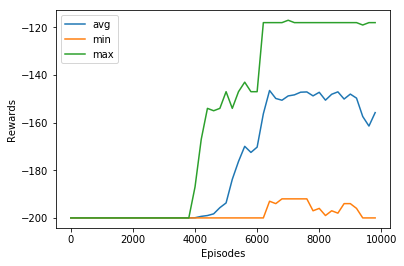

In [19]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label = 'avg')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label = 'min')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label = 'max')
plt.legend(loc='upper left')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

### 6. Rendering Test

In [20]:
done = False
state = env.reset()
while not done:
    action = np.argmax(q_table[get_discrete_state(state)])
    next_state, _, done, _ = env.step(action)
    state = next_state
    env.render()

env.close()